In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it

First, load the dataset.

In [157]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

In [158]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user,
        postgres_pw, postgres_host, postgres_port, postgres_db))

In [159]:
df = pd.read_sql_query('select * from lifeexpectancy',con=engine)
engine.dispose()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [160]:
#Extending viewablitiy of data
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 3000)
df.head(3000)



Country  Year      Status  \
0                                           Afghanistan  2015  Developing   
1                                           Afghanistan  2014  Developing   
2                                           Afghanistan  2013  Developing   
3                                           Afghanistan  2012  Developing   
4                                           Afghanistan  2011  Developing   
5                                           Afghanistan  2010  Developing   
6                                           Afghanistan  2009  Developing   
7                                           Afghanistan  2008  Developing   
8                                           Afghanistan  2007  Developing   
9                                           Afghanistan  2006  Developing   
10                                          Afghanistan  2005  Developing   
11                                          Afghanistan  2004  Developing   
12                                          Afghanistan  2003  Developing   
13                                          Afghanistan  2002  Developing   
14                                          Afghanistan  2001  Developing   
15                                          Afghanistan  2000  Developing   
16                                              Albania  2015  Developing   
17                                              Albania  2014  Developing   
18                                              Albania  2013  Developing   
19                                              Albania  2012  Developing   
20                                              Albania  2011  Developing   
21                                              Albania  2010  Developing   
22                                              Albania  2009  Developing   
23                                              Albania  2008  Developing   
24                                              Albania  2007  Developing   
25                                              Albania  2006  Developing   
26                                              Albania  2005  Developing   
27                                              Albania  2004  Developing   
28                                              Albania  2003  Developing   
29                                              Albania  2002  Developing   
30                                              Albania  2001  Developing   
31                                              Albania  2000  Developing   
32                                              Algeria  2015  Developing   
33                                              Algeria  2014  Developing   
34                                              Algeria  2013  Developing   
35                                              Algeria  2012  Developing   
36                                              Algeria  2011  Developing   
37                                        Côte d'Ivoire  2001  Developing   
38                                              Algeria  2010  Developing   
39                                              Algeria  2009  Developing   
40                                              Algeria  2008  Developing   
41                                              Algeria  2007  Developing   
42                                              Algeria  2006  Developing   
43                                              Algeria  2005  Developing   
44                                              Algeria  2004  Developing   
45                                              Algeria  2003  Developing   
46                                              Algeria  2002  Developing   
47                                              Algeria  2001  Developing   
48                                              Algeria  2000  Developing   
49                                               Angola  2015  Developing   
50                                               Angola  2014  Developing   
51                                          

In [161]:
#Check fraction of null values per column
(df.isnull().sum()/df.shape[0]).sort_values()

Country                            0.000000
Year                               0.000000
Status                             0.000000
infant deaths                      0.000000
percentage expenditure             0.000000
Measles                            0.000000
 HIV/AIDS                          0.000000
under-five deaths                  0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
Polio                              0.006467
Diphtheria                         0.006467
 thinness 5-9 years                0.011572
 thinness  1-19 years              0.011572
 BMI                               0.011572
Schooling                          0.055480
Income composition of resources    0.056841
Alcohol                            0.066031
Total expenditure                  0.076923
GDP                                0.152485
Hepatitis B                        0.188223
Population                         0.221920
dtype: float64

In [162]:
#These columns had a few countries with no population data, making them less usable as a feature coupled with that country
dfdrop = df.dropna(subset=['Population', 'GDP'])
#The rest of the Nan were replaced by interpolation as they were spread out within the data
dfdropinterp = dfdrop.interpolate()

In [163]:
#Checking there are no more nulls
dfdropinterp.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [164]:
dfdropinterp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2264 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2264 non-null   object 
 1   Year                             2264 non-null   int64  
 2   Status                           2264 non-null   object 
 3   Life expectancy                  2264 non-null   float64
 4   Adult Mortality                  2264 non-null   float64
 5   infant deaths                    2264 non-null   int64  
 6   Alcohol                          2264 non-null   float64
 7   percentage expenditure           2264 non-null   float64
 8   Hepatitis B                      2264 non-null   float64
 9   Measles                          2264 non-null   int64  
 10   BMI                             2264 non-null   float64
 11  under-five deaths                2264 non-null   int64  
 12  Polio               

In [165]:
# Replace columns with names stripped of spaces, since many column names have hidden spaces at the end
dfdropinterp.columns = dfdropinterp.columns.str.strip()

In [166]:
#All clean for column names!
dfdropinterp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2264 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2264 non-null   object 
 1   Year                             2264 non-null   int64  
 2   Status                           2264 non-null   object 
 3   Life expectancy                  2264 non-null   float64
 4   Adult Mortality                  2264 non-null   float64
 5   infant deaths                    2264 non-null   int64  
 6   Alcohol                          2264 non-null   float64
 7   percentage expenditure           2264 non-null   float64
 8   Hepatitis B                      2264 non-null   float64
 9   Measles                          2264 non-null   int64  
 10  BMI                              2264 non-null   float64
 11  under-five deaths                2264 non-null   int64  
 12  Polio               

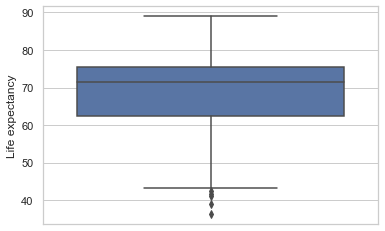

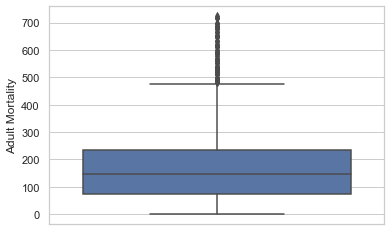

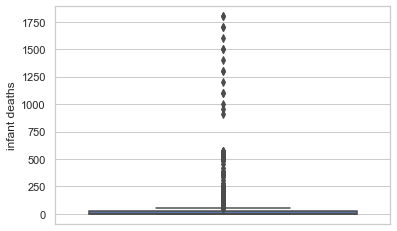

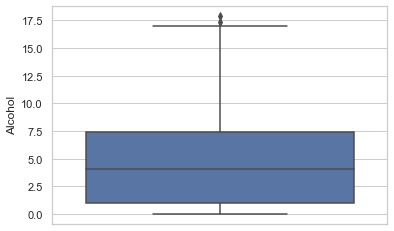

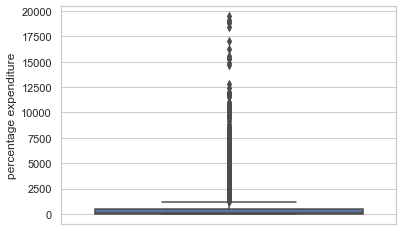

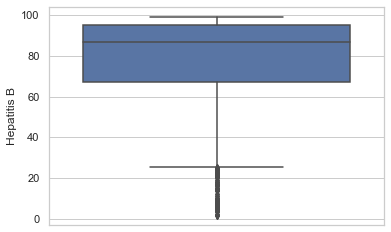

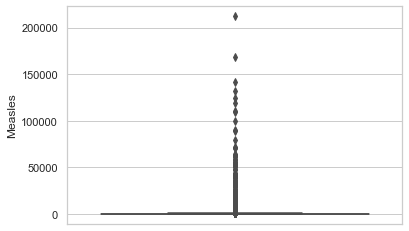

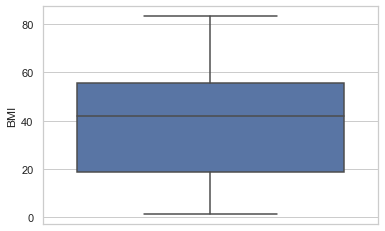

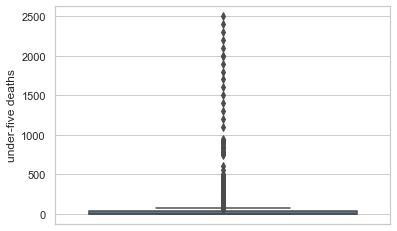

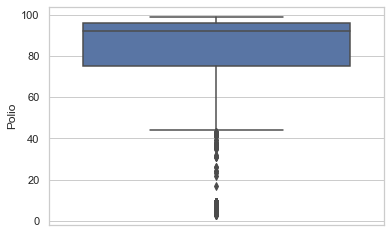

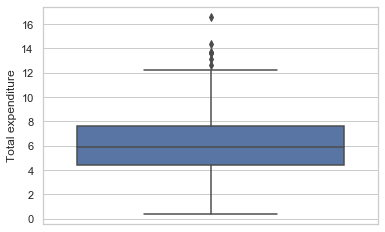

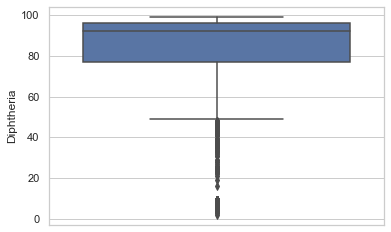

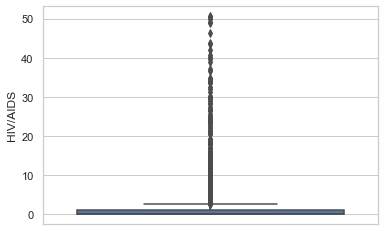

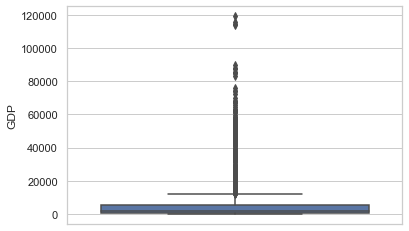

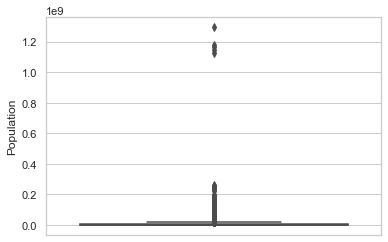

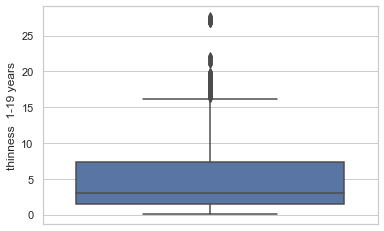

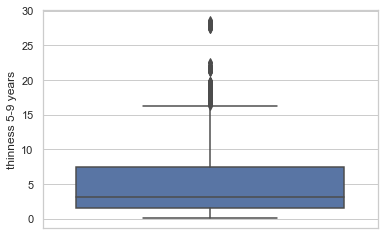

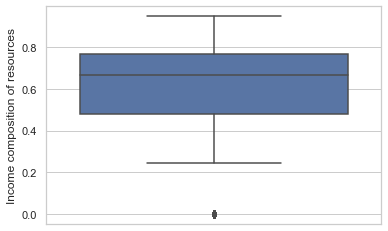

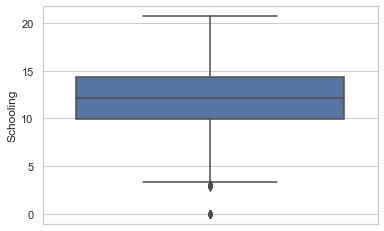

In [167]:
#Generate an iterator list for plotting numeric columns with for loop
dfdropinterpnum = dfdropinterp.columns[3:]
dfdropinterpnum

for x in dfdropinterpnum:

        sns.boxplot(y=dfdropinterp[x], data=dfdropinterp)
        plt.show()
        


There are lots of outliers in nearly every column variable

In [192]:
#Remove rows with major outliers--although this does remove countries with real data for real number of events (or lack of)
dfwin = dfdropinterp.copy()
numericallist = dfdropinterpnum.to_list() # Just ensuring that using an iterator list, not an index array
for x in numericallist:
    dfwin[x] = winsorize(dfdropinterp[x], (0.1,0.1))


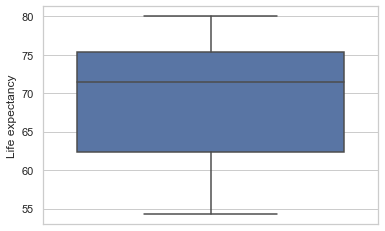

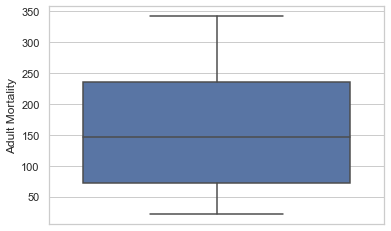

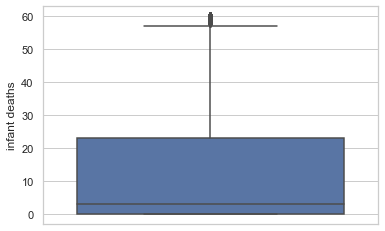

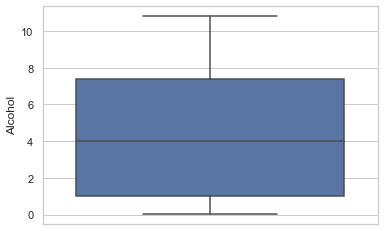

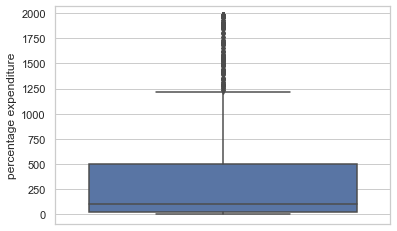

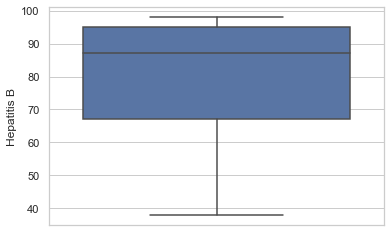

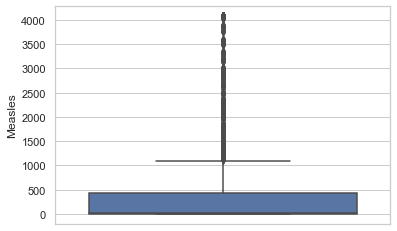

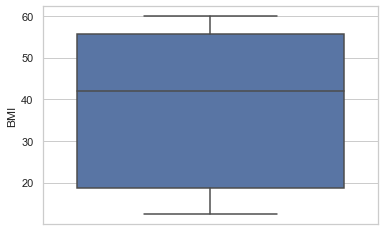

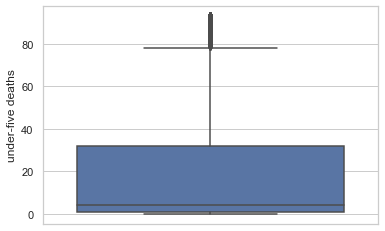

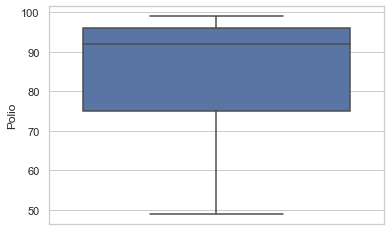

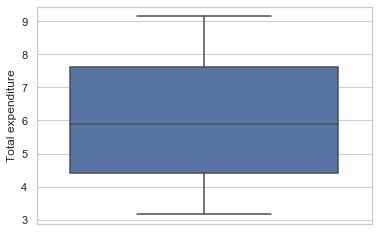

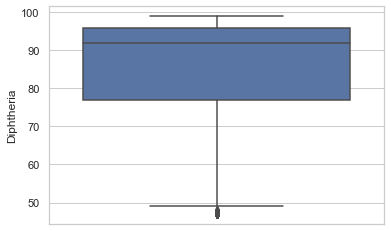

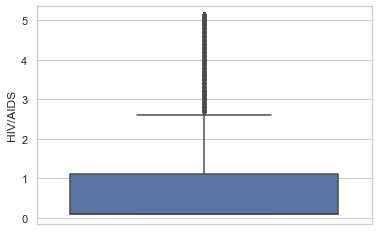

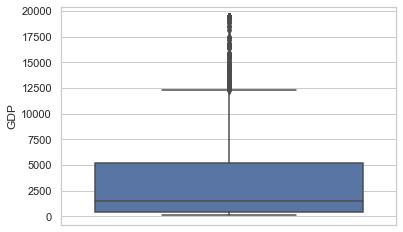

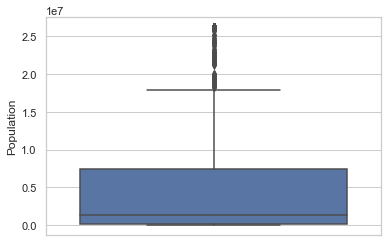

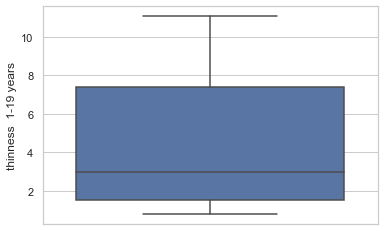

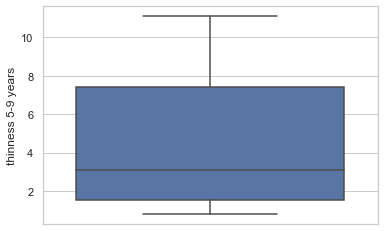

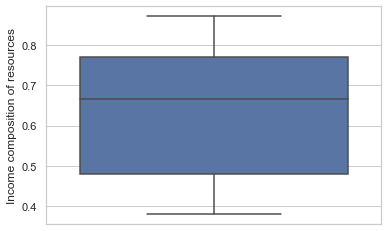

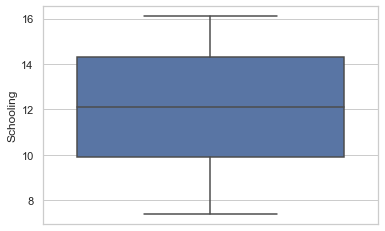

In [193]:
#Plotting the winsorized data for univariate analysis
for x in numericallist:

        sns.boxplot(y=dfwin[x], data=dfwin)
        plt.show()
        


Still there are several variables with outliers but I will ignore those as features for analysis

# Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In [194]:
#More univariate analysis:
dfwin.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2264.000000      2264.000000      2264.000000    2264.000000   
mean   2007.504859        68.906648       160.193463      14.757067   
std       4.602155         8.460059       102.838520      20.535543   
min    2000.000000        54.300000        22.000000       0.000000   
25%    2004.000000        62.300000        72.000000       0.000000   
50%    2008.000000        71.400000       146.000000       3.000000   
75%    2011.000000        75.400000       235.250000      23.000000   
max    2015.000000        80.000000       342.000000      60.000000   

           Alcohol  percentage expenditure  Hepatitis B      Measles  \
count  2264.000000             2264.000000  2264.000000  2264.000000   
mean      4.514273              413.705430    79.118462   670.348940   
std       3.705508              621.316310    19.763694  1306.747226   
min       0.040000                3.304040    38.000000     0.000000   
25%       0.997500               22.166537    67.068182     0.000000   
50%       4.035000               97.600031    87.000000    18.000000   
75%       7.400000              501.950334    95.000000   441.000000   
max      10.800000             1968.816817    98.000000  4076.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2264.000000        2264.000000  2264.000000        2264.000000   
mean     37.678426          21.699205    84.122949           6.028253   
std      17.998323          31.674801    16.260209           1.936918   
min      12.500000           0.000000    49.000000           3.170000   
25%      18.800000           1.000000    75.000000           4.400000   
50%      42.000000           4.000000    92.000000           5.900000   
75%      55.725000          32.000000    96.000000           7.610000   
max      59.900000          93.000000    99.000000           9.140000   

        Diphtheria     HIV/AIDS           GDP    Population  \
count  2264.000000  2264.000000   2264.000000  2.264000e+03   
mean     84.122981     1.058657   4390.281217  5.763893e+06   
std      16.545109     1.684447   6032.309315  8.459017e+06   
min      47.000000     0.100000    146.838510  2.949100e+04   
25%      77.000000     0.100000    435.661704  1.951538e+05   
50%      92.000000     0.100000   1521.980960  1.374823e+06   
75%      96.000000     1.100000   5178.561948  7.391118e+06   
max      99.000000     5.100000  19375.569600  2.621485e+07   

       thinness  1-19 years  thinness 5-9 years  \
count           2264.000000         2264.000000   
mean               4.495705            4.539100   
std                3.493553            3.507627   
min                0.800000            0.800000   
25%                1.500000            1.500000   
50%                3.000000            3.100000   
75%                7.400000            7.400000   
max               11.066667           11.100000   

       Income composition of resources    Schooling  
count                      2264.000000  2264.000000  
mean                          0.636912    11.993375  
std                           0.163731     2.792147  
min                           0.381000     7.400000  
25%                           0.481000     9.900000  
50%                           0.666000    12.100000  
75%                           0.769000    14.300000  
max                           0.871000    16.100000

Life expectancy


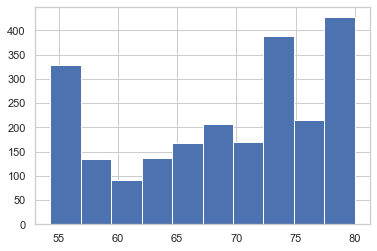

Adult Mortality


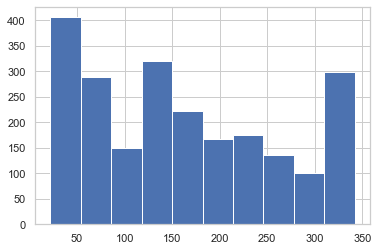

infant deaths


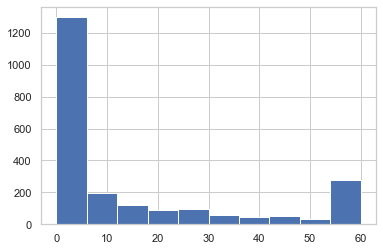

Alcohol


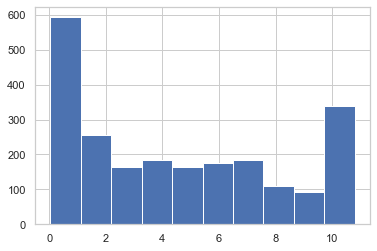

percentage expenditure


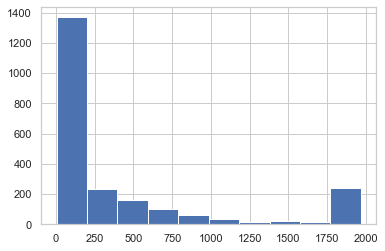

Hepatitis B


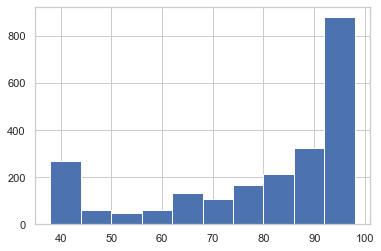

Measles


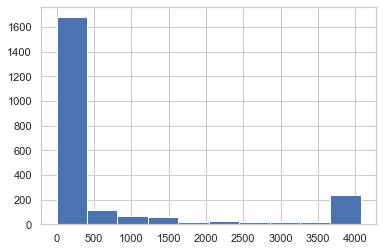

BMI


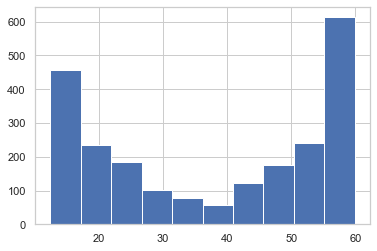

under-five deaths


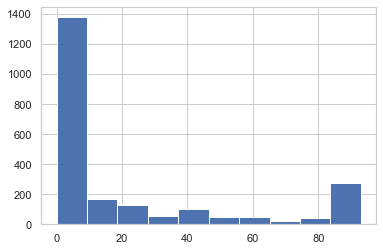

Polio


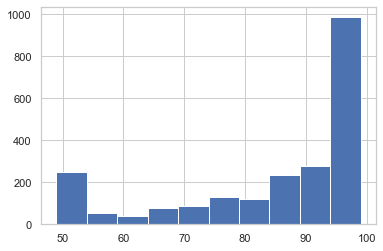

Total expenditure


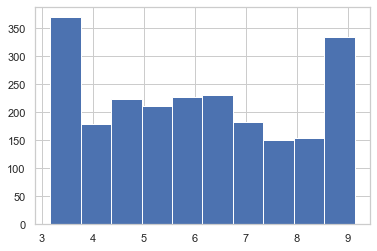

Diphtheria


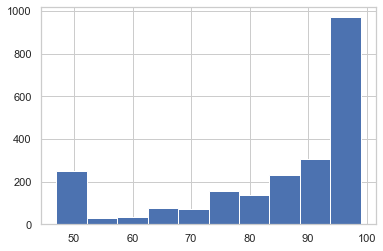

HIV/AIDS


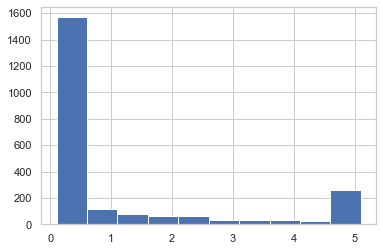

GDP


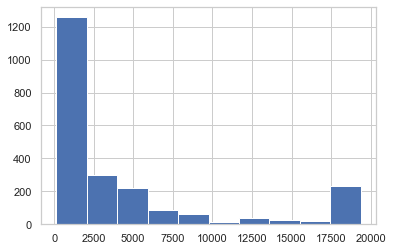

Population


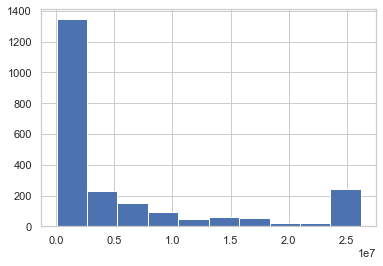

thinness  1-19 years


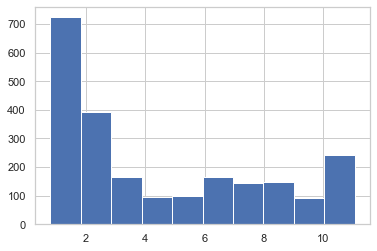

thinness 5-9 years


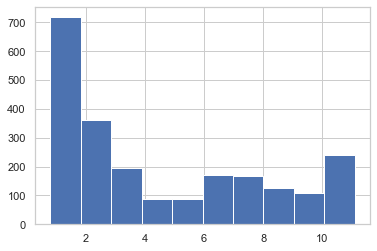

Income composition of resources


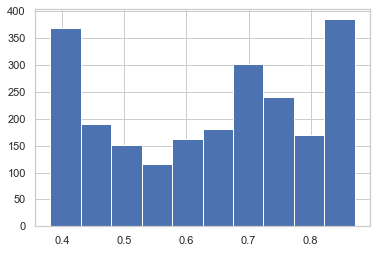

Schooling


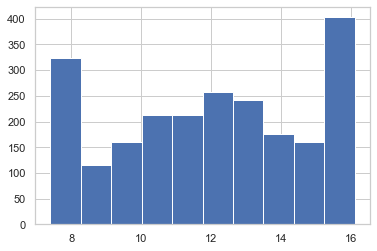

In [195]:
#Checking distributions for normality
for x in numericallist:
  plt.hist(dfwin[x])
  print(x)
  plt.show()
#The distributions of these variables are highly non-normal

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2264 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2264 non-null   object 
 1   Year                             2264 non-null   int64  
 2   Status                           2264 non-null   object 
 3   Life expectancy                  2264 non-null   float64
 4   Adult Mortality                  2264 non-null   float64
 5   infant deaths                    2264 non-null   int64  
 6   Alcohol                          2264 non-null   float64
 7   percentage expenditure           2264 non-null   float64
 8   Hepatitis B                      2264 non-null   float64
 9   Measles                          2264 non-null   int64  
 10  BMI                              2264 non-null   float64
 11  under-five deaths                2264 non-null   int64  
 12  Polio               

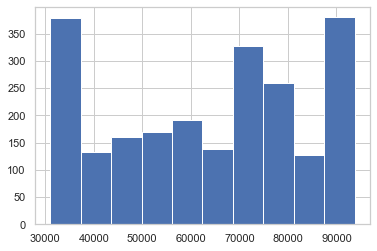

Adult Mortality


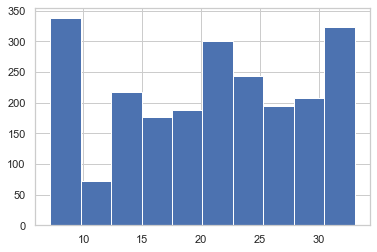

infant deaths


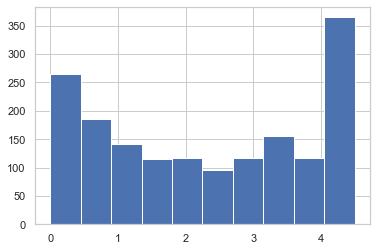

Alcohol


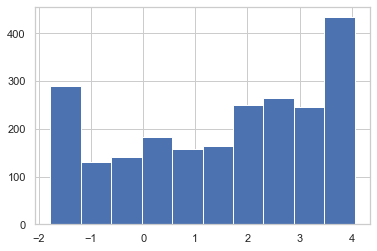

percentage expenditure


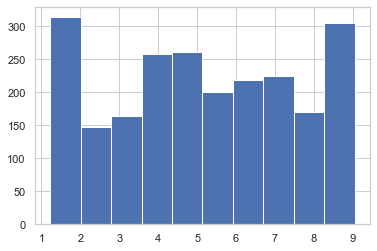

Hepatitis B


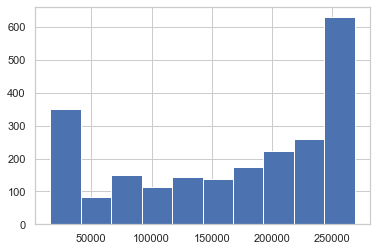

Measles


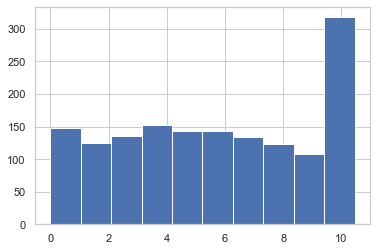

BMI


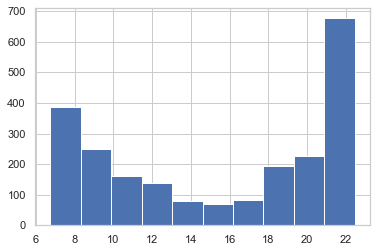

under-five deaths


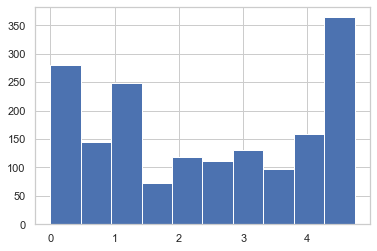

Polio


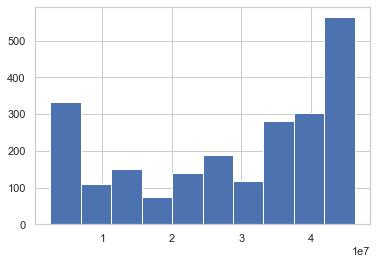

Total expenditure


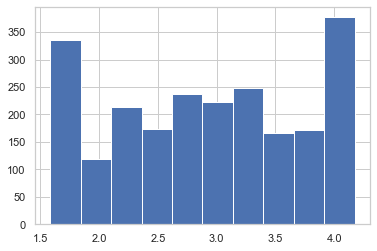

Diphtheria


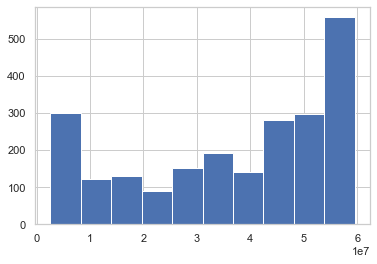

HIV/AIDS


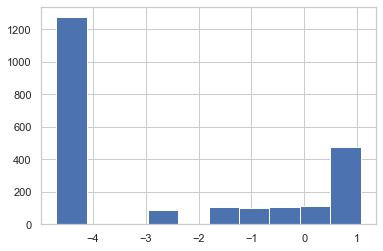

GDP


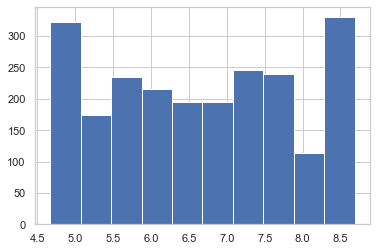

Population


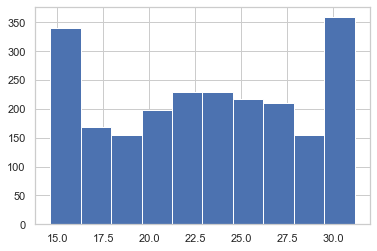

thinness  1-19 years


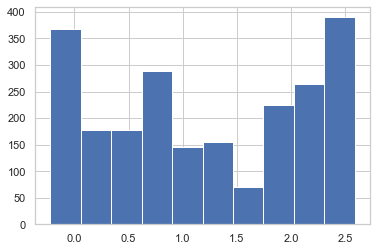

thinness 5-9 years


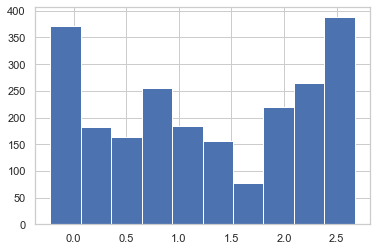

Income composition of resources


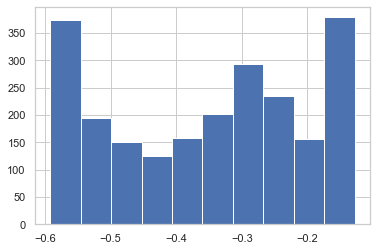

Schooling


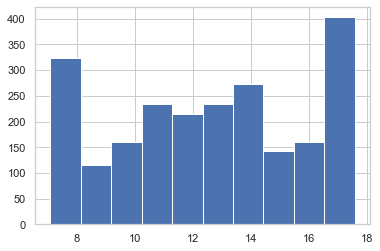

In [196]:
#Try to 
from scipy.stats import boxcox
dfwincox = dfwin.copy()
dfwincox.replace(0, 1, inplace=True)
dfwincox.head(3000)
print(dfwincox.info())
for x in numericallist:
    dfwincox[x] = boxcox(dfwincox[x])[0]
    plt.hist(boxcox(dfwin.loc[dfwin[x]>0,x])[0])
    print(x)
    plt.show()


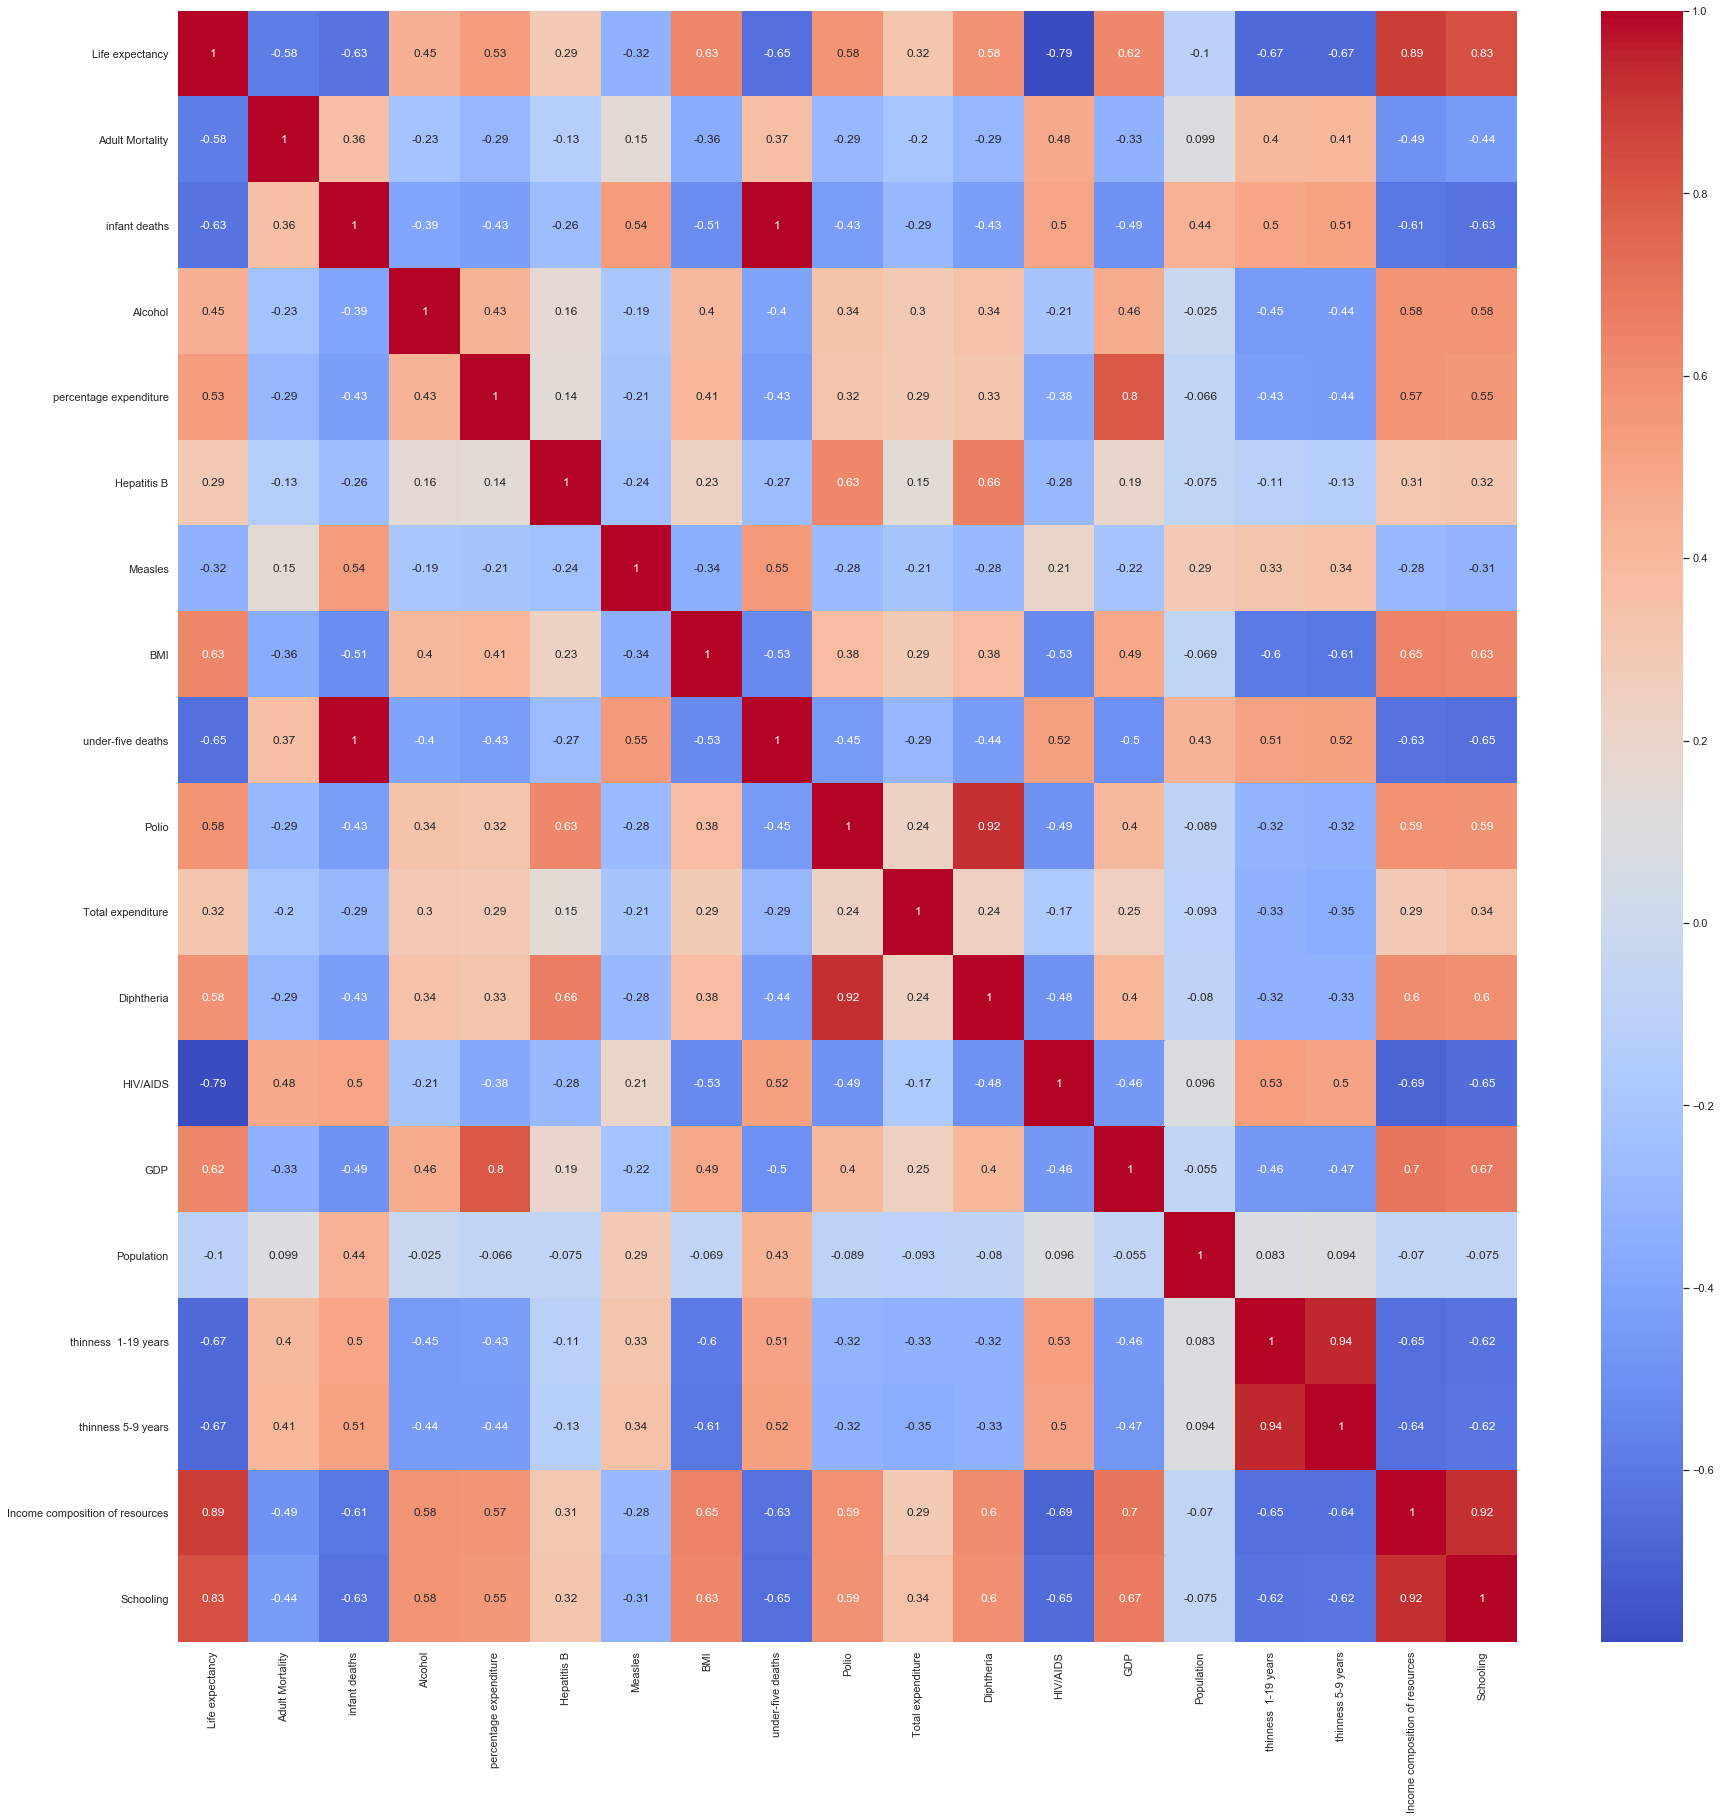

In [197]:
#Bivariate analysis with heatmap after winsorization and boxcox normalization
dfwincoxnum = dfwincox.iloc[0:,3:]
plt.figure(figsize=(30, 30))

sns.heatmap(dfwincoxnum.select_dtypes(include='number').corr(), annot = True, cmap = 'coolwarm')

Schooling correlated with life expectance and had several relationships with other variables across the board.

<Figure size 2160x2160 with 0 Axes>

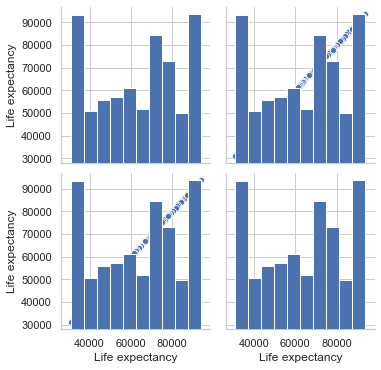

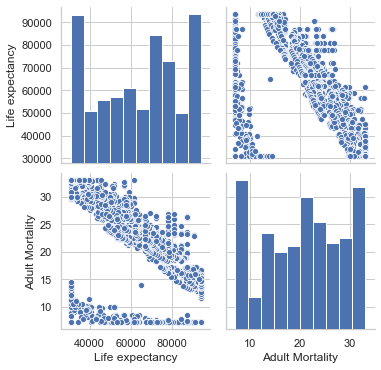

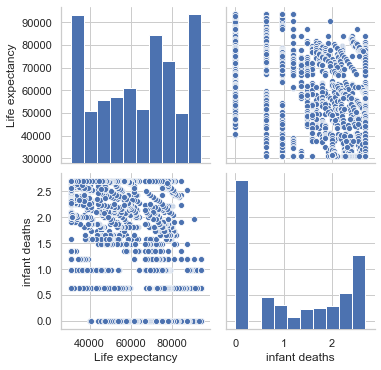

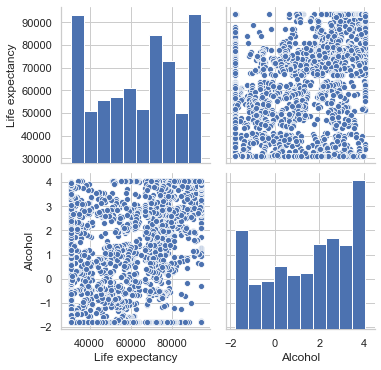

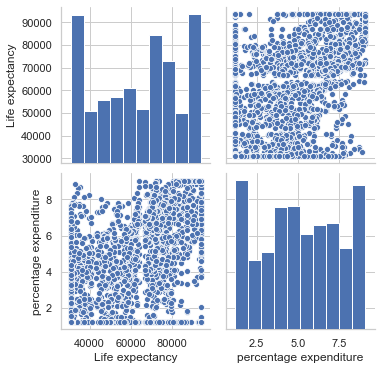

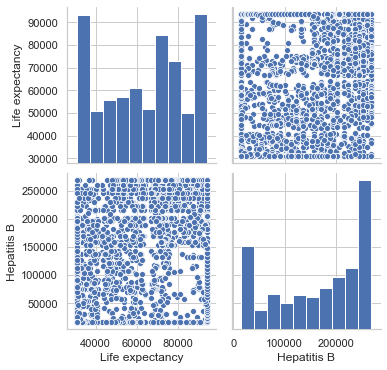

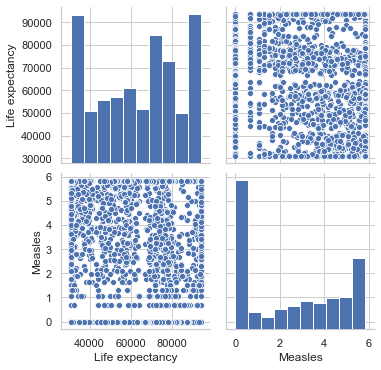

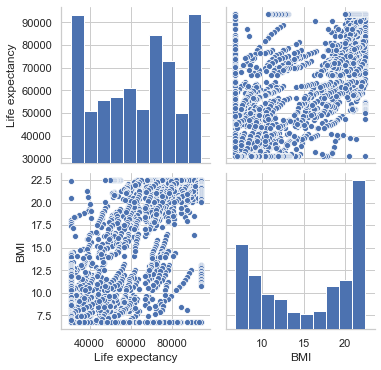

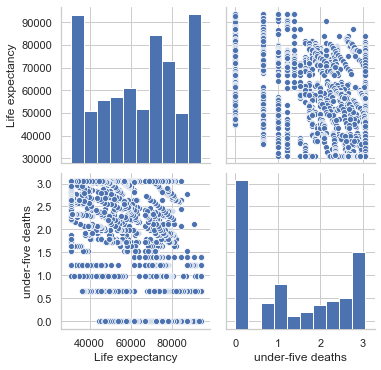

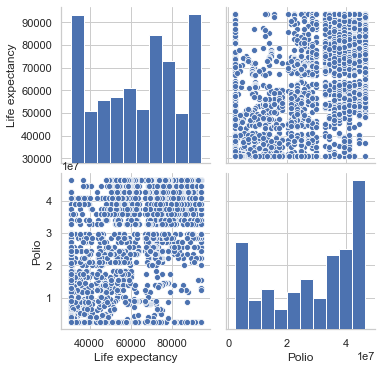

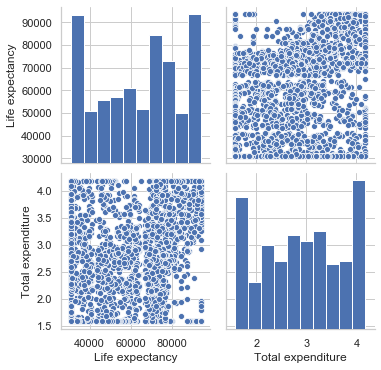

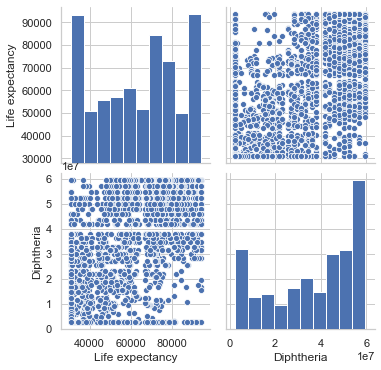

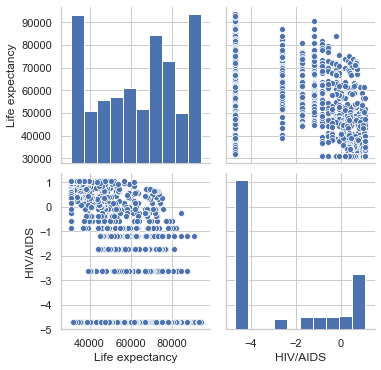

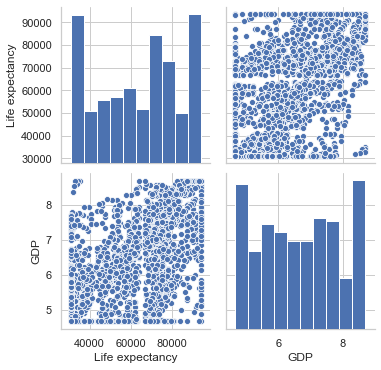

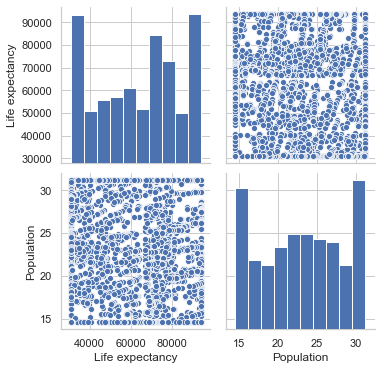

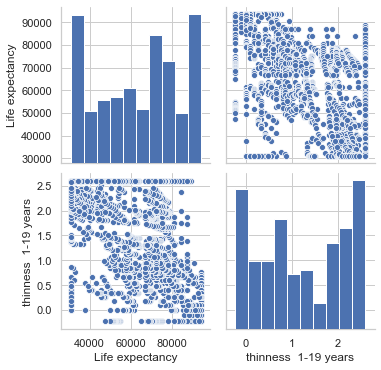

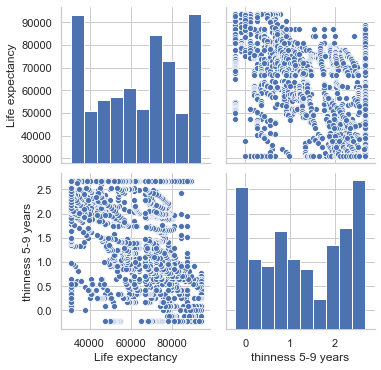

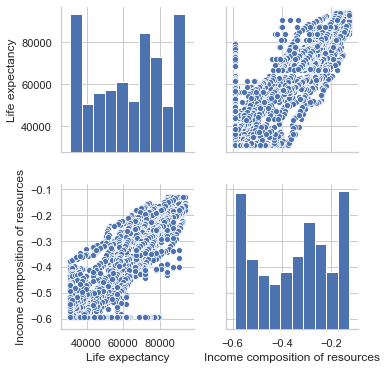

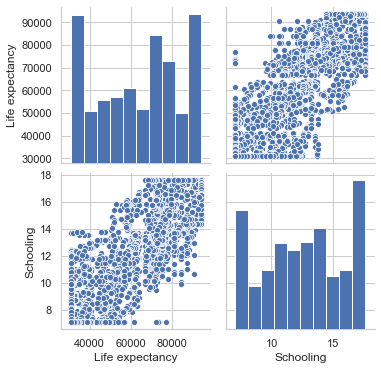

In [229]:
#Bivariate analysis with pairplot after winsorization and boxcox normalization
plt.figure(figsize=(30, 30))
for x in numericallist:
  sns.pairplot(dfwincoxnum, vars=['Life expectancy', x])



<Figure size 2160x2160 with 0 Axes>

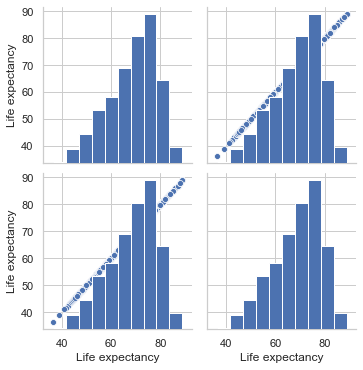

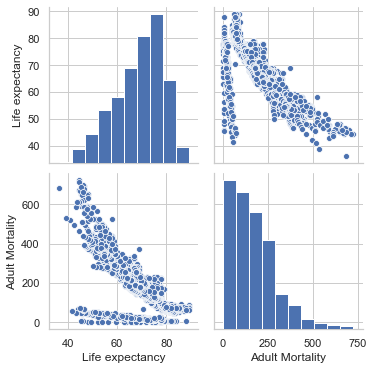

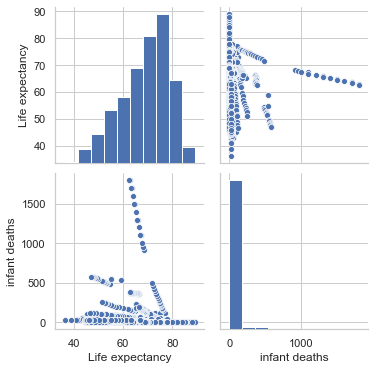

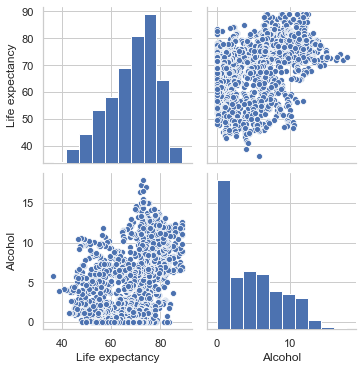

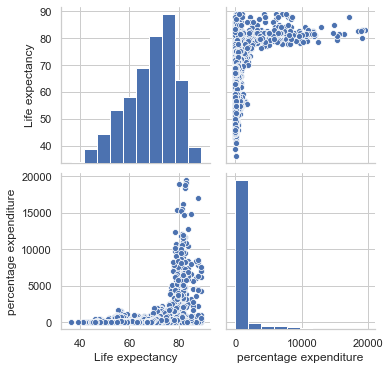

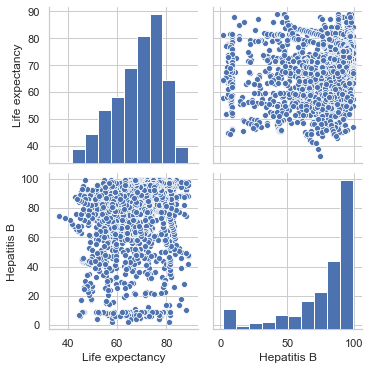

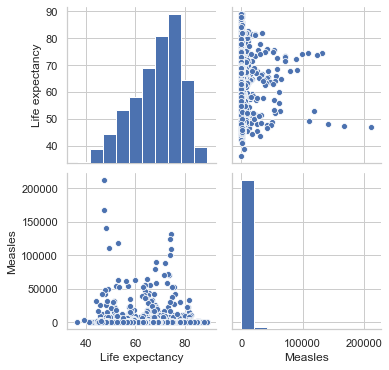

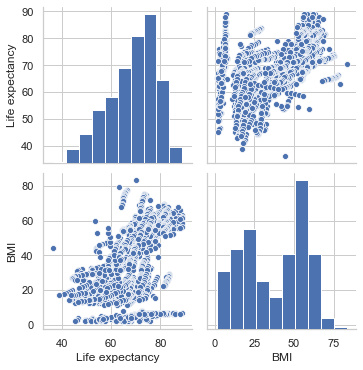

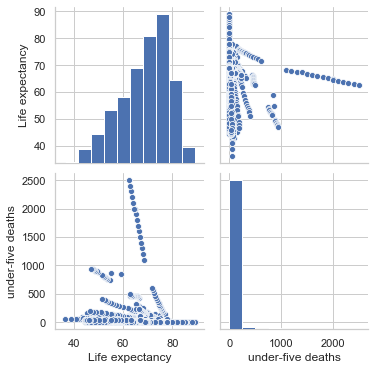

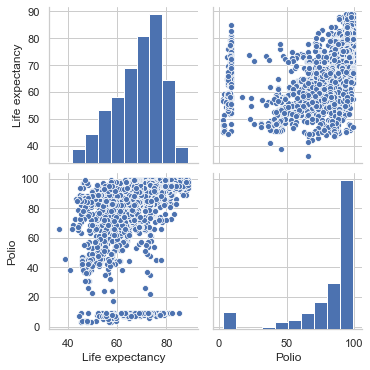

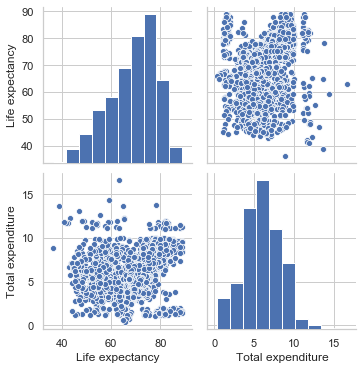

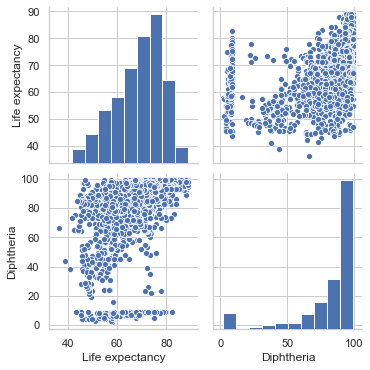

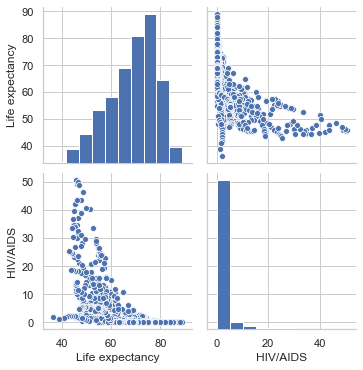

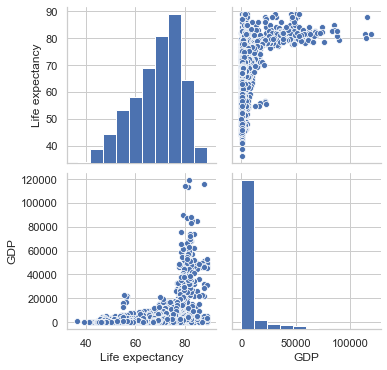

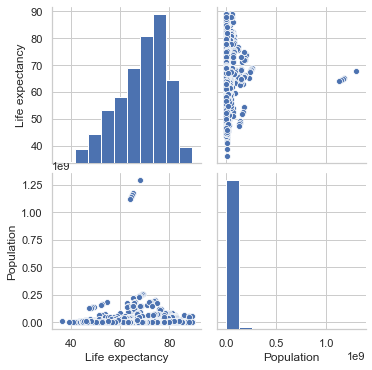

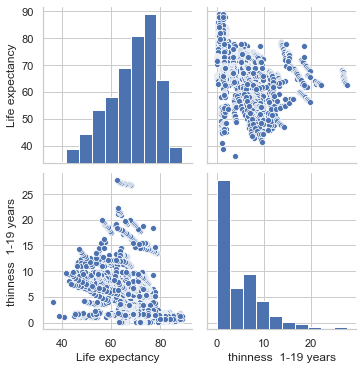

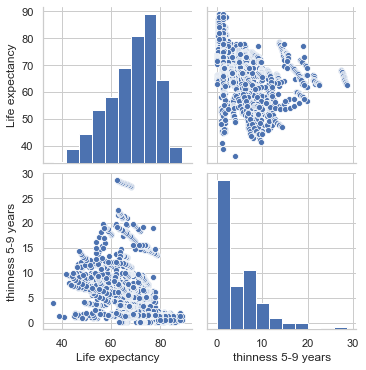

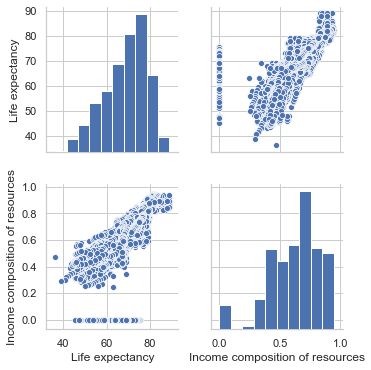

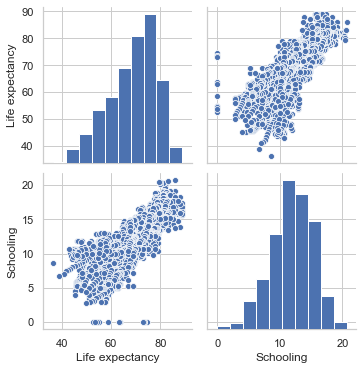

In [230]:
#Tried with dataframe that only dropped nulls but retained outliers and no normalization. These distributions look more normal, even
#without boxcox!!
plt.figure(figsize=(30, 30))
for x in numericallist:
  sns.pairplot(dfdropinterp, vars=['Life expectancy', x])

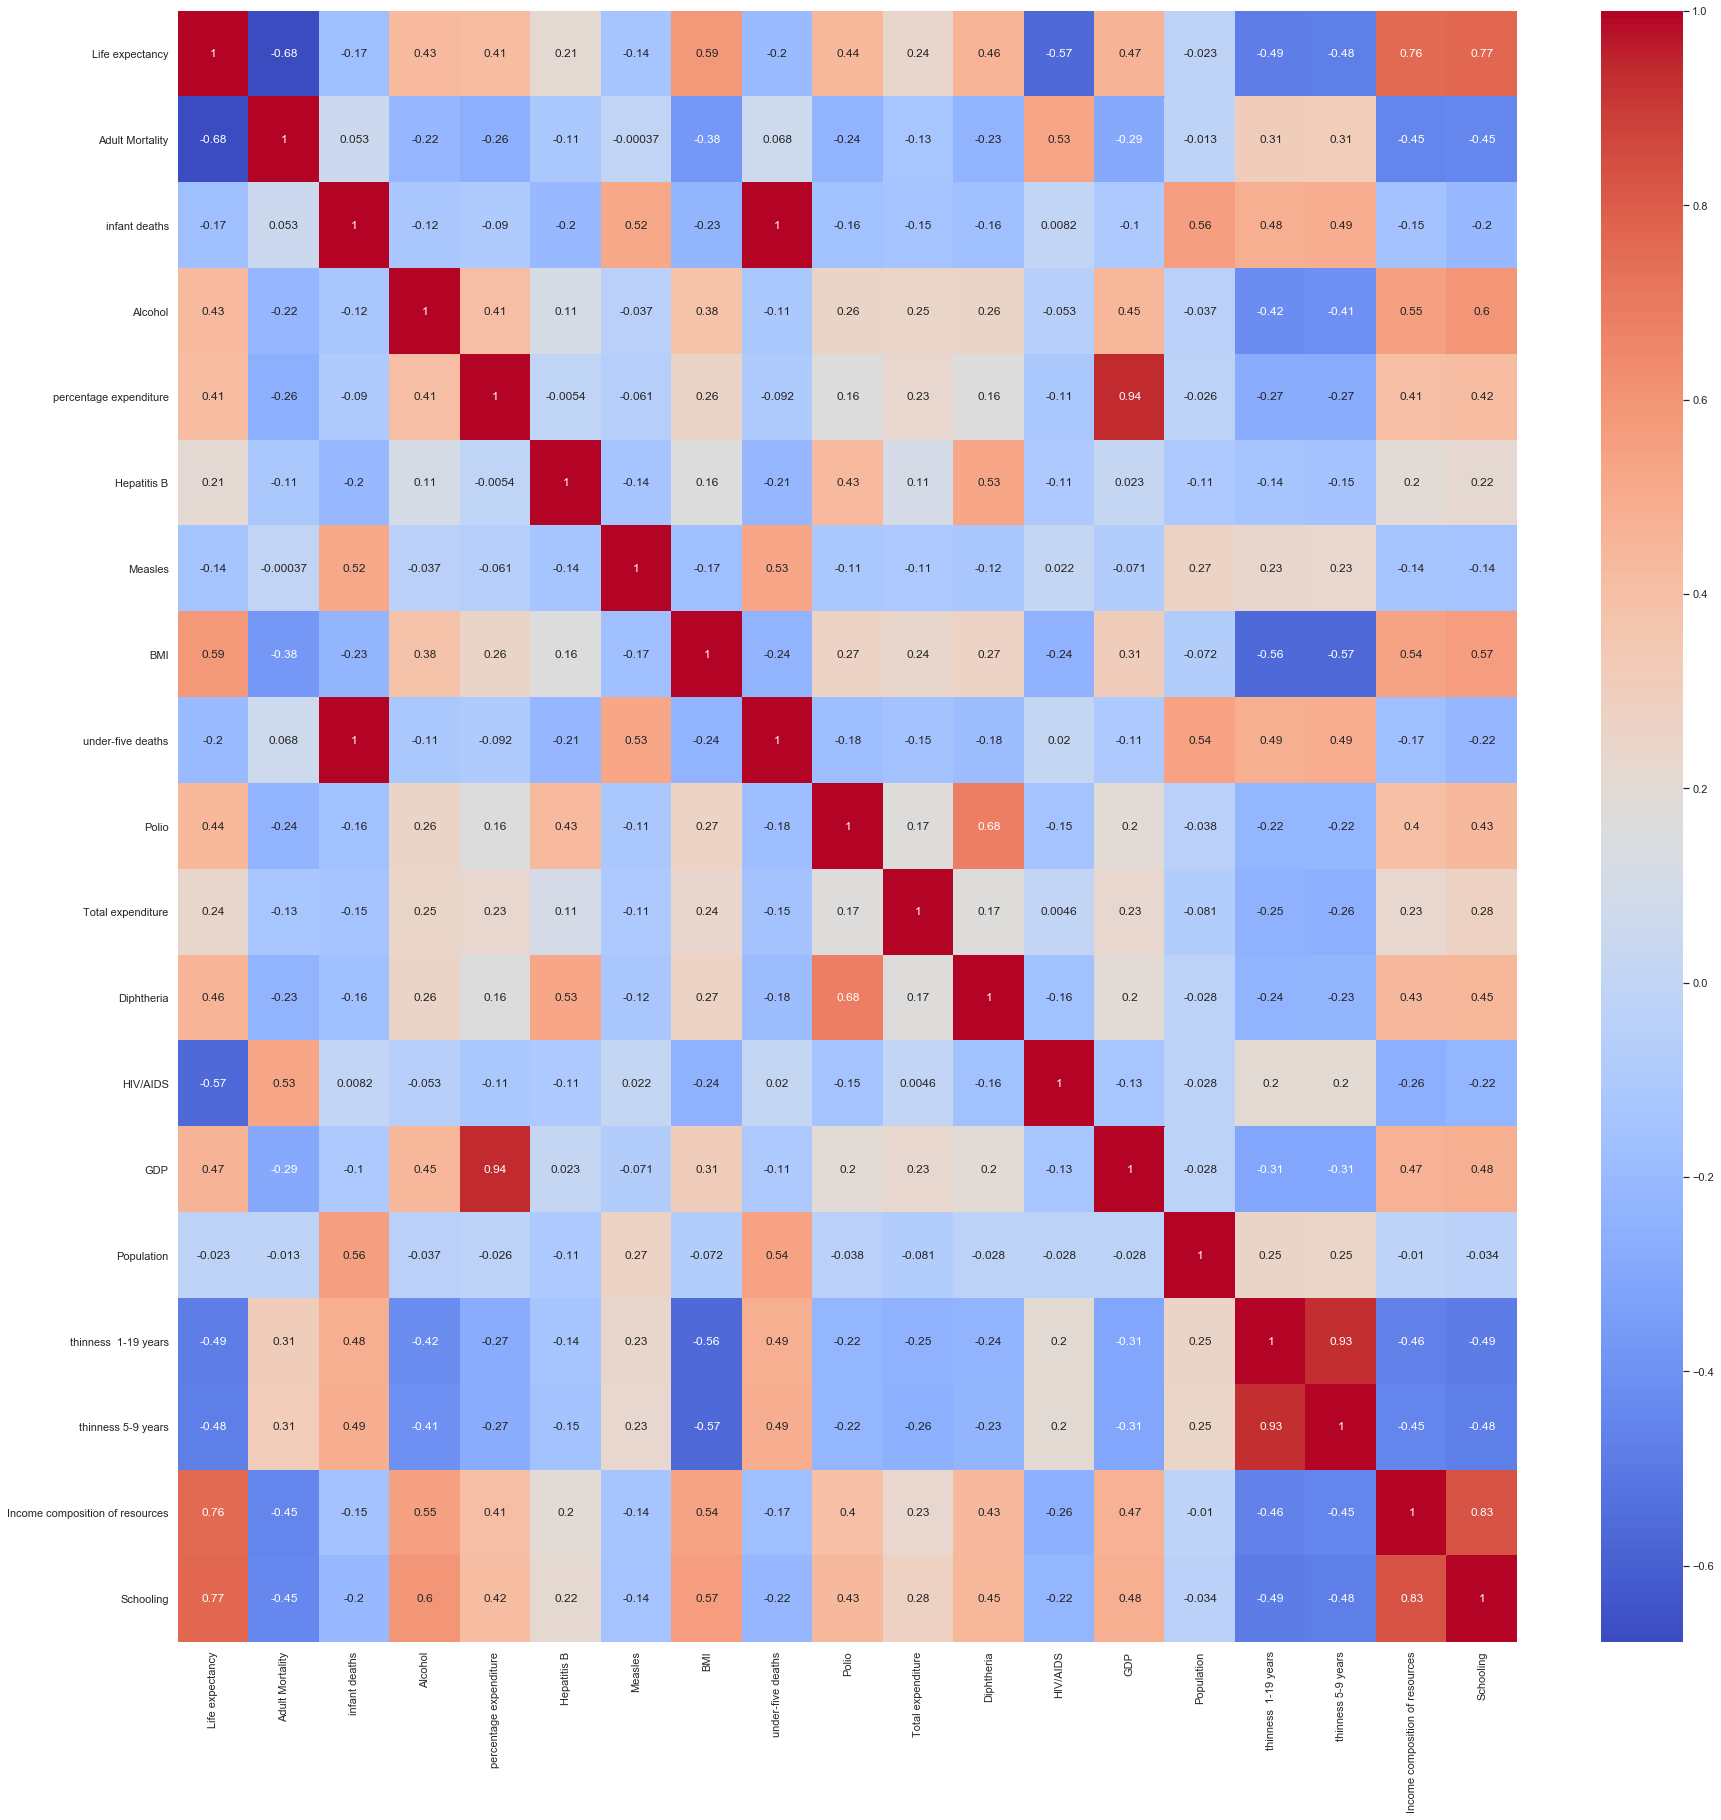

In [199]:
#Correlations are still similar to above normalized and trimmed dataset
dfinterpnum = dfdropinterp.iloc[0:,3:]
plt.figure(figsize=(30, 30))

sns.heatmap(dfinterpnum.select_dtypes(include='number').corr(), annot = True, cmap = 'coolwarm')

# In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

In [201]:
dfwincox.corr()

Year  Life expectancy  Adult Mortality  \
Year                             1.000000         0.136013        -0.027580   
Life expectancy                  0.136013         1.000000        -0.582331   
Adult Mortality                 -0.027580        -0.582331         1.000000   
infant deaths                   -0.040027        -0.627206         0.358485   
Alcohol                         -0.110991         0.445680        -0.228603   
percentage expenditure          -0.022896         0.534413        -0.292886   
Hepatitis B                      0.189676         0.289562        -0.133194   
Measles                         -0.102045        -0.322912         0.154471   
BMI                              0.083942         0.630196        -0.358324   
under-five deaths               -0.044087        -0.648221         0.371159   
Polio                            0.120578         0.578371        -0.289721   
Total expenditure                0.056695         0.321876        -0.202774   
Diphtheria                       0.150268         0.584584        -0.293283   
HIV/AIDS                        -0.054108        -0.788088         0.480557   
GDP                              0.195830         0.623273        -0.329195   
Population                       0.048515        -0.101905         0.098752   
thinness  1-19 years            -0.029694        -0.667820         0.396619   
thinness 5-9 years              -0.028070        -0.672510         0.410887   
Income composition of resources  0.175213         0.885466        -0.486307   
Schooling                        0.186308         0.825497        -0.441227   

                                 infant deaths   Alcohol  \
Year                                 -0.040027 -0.110991   
Life expectancy                      -0.627206  0.445680   
Adult Mortality                       0.358485 -0.228603   
infant deaths                         1.000000 -0.393628   
Alcohol                              -0.393628  1.000000   
percentage expenditure               -0.426533  0.428245   
Hepatitis B                          -0.259967  0.158305   
Measles                               0.541373 -0.188442   
BMI                                  -0.511092  0.398033   
under-five deaths                     0.995465 -0.397397   
Polio                                -0.434576  0.336868   
Total expenditure                    -0.290680  0.295763   
Diphtheria                           -0.426639  0.344962   
HIV/AIDS                              0.498349 -0.212886   
GDP                                  -0.487127  0.463588   
Population                            0.436716 -0.024833   
thinness  1-19 years                  0.495647 -0.450190   
thinness 5-9 years                    0.511407 -0.442237   
Income composition of resources      -0.612482  0.578446   
Schooling                            -0.629561  0.578144   

                                 percentage expenditure  Hepatitis B  \
Year                                          -0.022896     0.189676   
Life expectancy                                0.534413     0.289562   
Adult Mortality                               -0.292886    -0.133194   
infant deaths                                 -0.426533    -0.259967   
Alcohol                                        0.428245     0.158305   
percentage expenditure                         1.000000     0.144918   
Hepatitis B                                    0.144918     1.000000   
Measles                                       -0.212668    -0.238752   
BMI                                            0.408092     0.226077   
under-five deaths                             -0.434196    -0.265133   
Polio                                          0.323091     0.626956   
Total expenditure                              0.293117     0.146302   
Diphtheria                                     0.329407     0.662549   
HIV/AIDS                                      -0.377357    -0.281542   
GDP                                 

In [237]:
# Picking out the most negative and positively correlated (threshold at 0.6)--using the transformed data
dfwincox_lf_corr = dfwincox.corr().iloc[0:,1]
dfwincox_lf_corr



abscorr = np.abs(dfwincox_lf_corr).sort_values(ascending=False)
abscorr

Life expectancy                    1.000000
Income composition of resources    0.885466
Schooling                          0.825497
HIV/AIDS                           0.788088
thinness 5-9 years                 0.672510
thinness  1-19 years               0.667820
under-five deaths                  0.648221
BMI                                0.630196
infant deaths                      0.627206
GDP                                0.623273
Diphtheria                         0.584584
Adult Mortality                    0.582331
Polio                              0.578371
percentage expenditure             0.534413
Alcohol                            0.445680
Measles                            0.322912
Total expenditure                  0.321876
Hepatitis B                        0.289562
Year                               0.136013
Population                         0.101905
Name: Life expectancy, dtype: float64

In [236]:
#Collect the list of relevant correlations with life expectancy
topcorrlist = dfwincox_lf_corr[abscorr.index[0:8]].sort_values(ascending=False)
topcorrlist
    

Life expectancy                    1.000000
Income composition of resources    0.885466
Schooling                          0.825497
BMI                                0.630196
under-five deaths                 -0.648221
thinness  1-19 years              -0.667820
thinness 5-9 years                -0.672510
HIV/AIDS                          -0.788088
Name: Life expectancy, dtype: float64

# Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

Besides income, schooling has a high positive effect on life expectancy. It is also clear that HIV is is still a prevalaent disease and shortens lifespan, despite the advances in treatment. Another factor is survival through the early years of your life until the age of 5. Early death is a major factor that weighs down overall life expectancy average. Finally, the data suggests that calorie intake is a factor that determines life expectancy. under nutrition in younger childern and teens is negatively correlated with life span. This most likely reflects the lower status is poorer countries with high incidence of starvation. Consistent with this, BMI is positively correlated with life expectancy. BMI also appears positively correlated with schooling and 